# **`Exploratory Data Analysis-2`**

## **FLIGHT PRICE DATASET**

In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [476]:
#Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df = pd.read_excel("D:/pwskills-Data_Science_Masters/machine learning/ml video practice notebooks/flight_price.xlsx")
print("The number of rows in flight dataset is {} and the number of columns is {}".format(df.shape[0],df.shape[1]))

The number of rows in flight dataset is 10683 and the number of columns is 11


Text(0.5, 1.0, 'Histogram of flight prices')

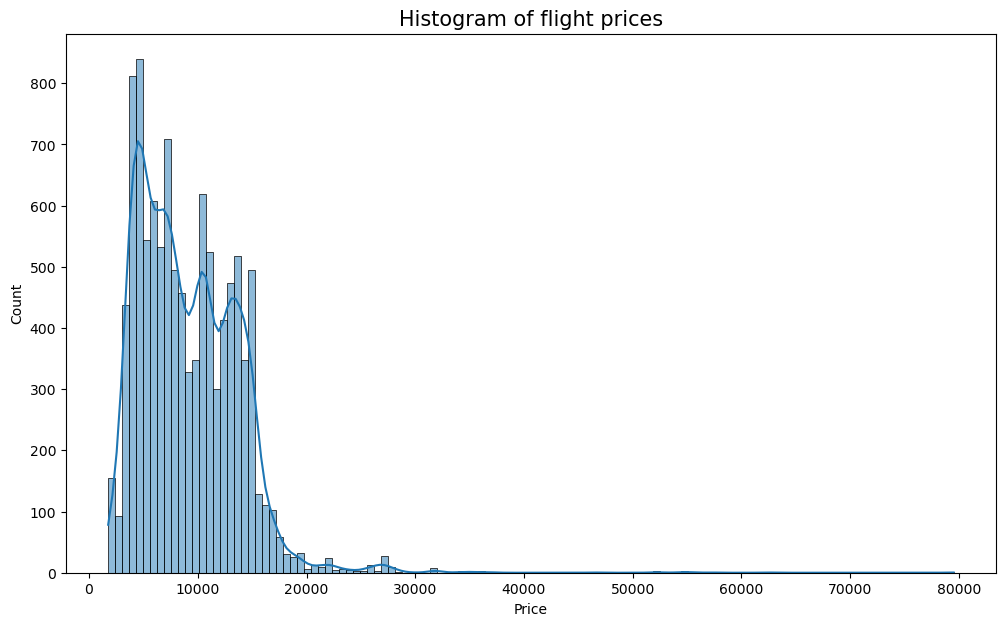

In [477]:
#Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
plt.figure(figsize=(12,7))
sns.histplot(data=df,x="Price",kde=True)
plt.title("Histogram of flight prices",fontsize=15)

## Observation:
Flight prices is a right skewed distribution

In [478]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
df.Price.describe()
print("The range of flight prices is {}".format(df.Price.max() - df.Price.min()))
print("The minimum flight price is {}".format(df.Price.min()))
print("The maximum flight price is {}".format(df.Price.max()))

The range of flight prices is 77753
The minimum flight price is 1759
The maximum flight price is 79512


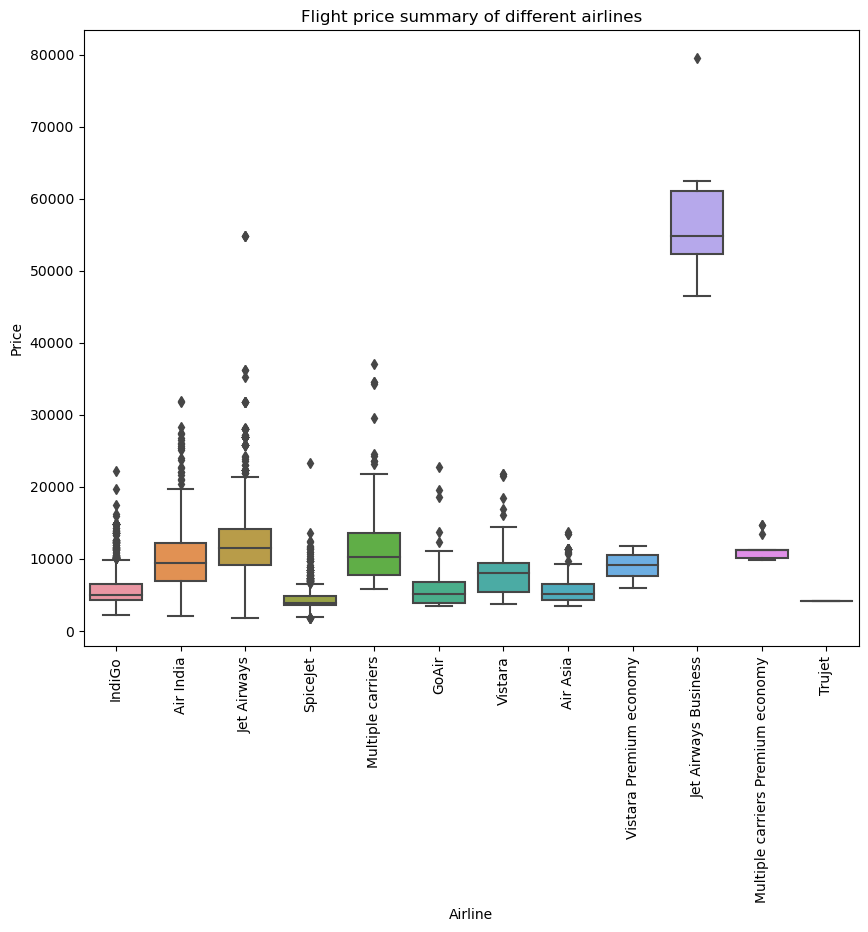

In [479]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="Airline",y="Price")
plt.xticks(rotation=90)
plt.title("Flight price summary of different airlines")
plt.show()

`Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.`

<Axes: ylabel='Price'>

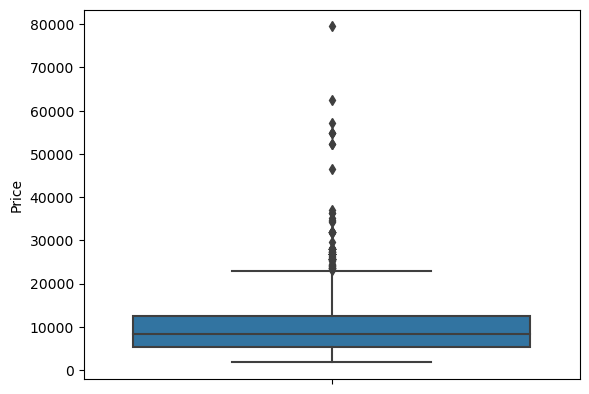

In [480]:
sns.boxplot(data=df,y="Price")

<Axes: xlabel='Price', ylabel='Density'>

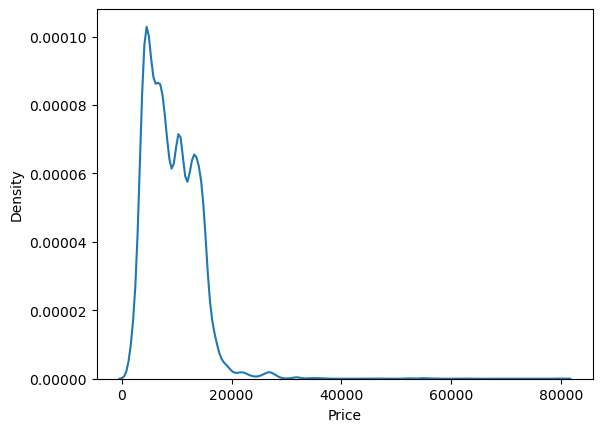

In [481]:
sns.kdeplot(data=df,x="Price")

## Observations: 
There are outliers in the price of flights as depicted in the boxplot above. The outliers are above the boxplot which indicates that the outliers are on the higher side of price (>250k).This leads to a right skewed distribution as represented in the kdeplot. The outliers drag the mean to that correspoding side and therefore we should either consider median for our analysis or exclude the outliers from our analysis

`Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?`

In [482]:
# we can make use of the Date_of_Journey to identify the peak travel season
#first we will convert the Date_of_Journey to datetime format
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

In [483]:
#extracting month  data separately for analysis
df["Month"] = df["Date_of_Journey"].dt.month_name()

In [484]:
#preparing data for getting the peak season by month 
data = pd.DataFrame(df.Month.value_counts())
data.rename(columns={"Month":"Count"},inplace=True)


Text(0.5, 1.0, 'No of fligths per month')

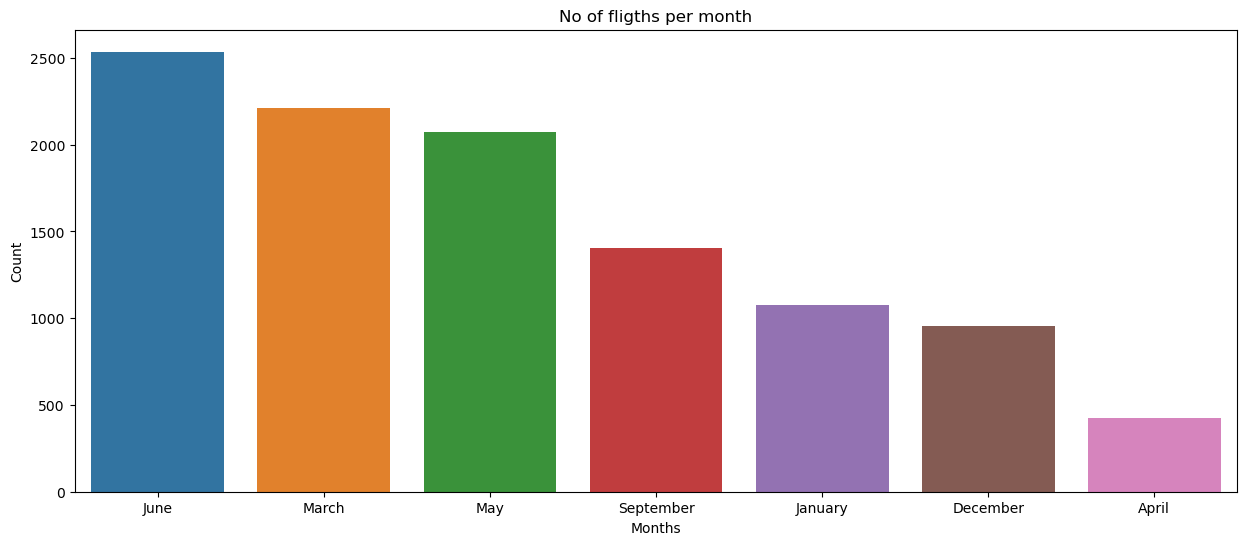

In [485]:
#plotting 
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=data.index,y=data.Count)
plt.xlabel("Months")
plt.title("No of fligths per month")

## Observation:
The peak travel season seems to be in June , March and May which corresponds to the maximum flights booked during these times

`Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?`

`and`

`Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?
`

As a data analyst, to identify trends and factors in the flight prices, I would analyze the following features of the Flight Price dataset which is given:

1. Time-based features: I would look at the date and time of the flights, including the month to see if there are any trends based on seasonality or peak travel times.

2. Route-based features: I would examine the the duration between the destinations, and the number of stops along the route to see if there are any patterns in pricing based on the route.

3. Carrier-based features: I would investigate the airlines offering the flights, looking for patterns in pricing between different carriers and their pricing strategies.

To present my findings to my team, I would use various visualizations such as:

1. Line charts: to show trends in flight prices over time, by plotting price on the y-axis and time on the x-axis.

2. Scatter plots: to investigate the relationship between flight prices and other features such as distance, number of stops, and carrier.

3. Heatmaps: to show pricing patterns based on different time and route combinations.

4. Boxplots: to visualize the distribution of prices for different time or route-based features.

Using these visualizations, I can provide a clear picture of the trends in flight prices and the factors that affect them.

In [486]:
#assigning numbers to months
df["Month"] = df["Date_of_Journey"].dt.month

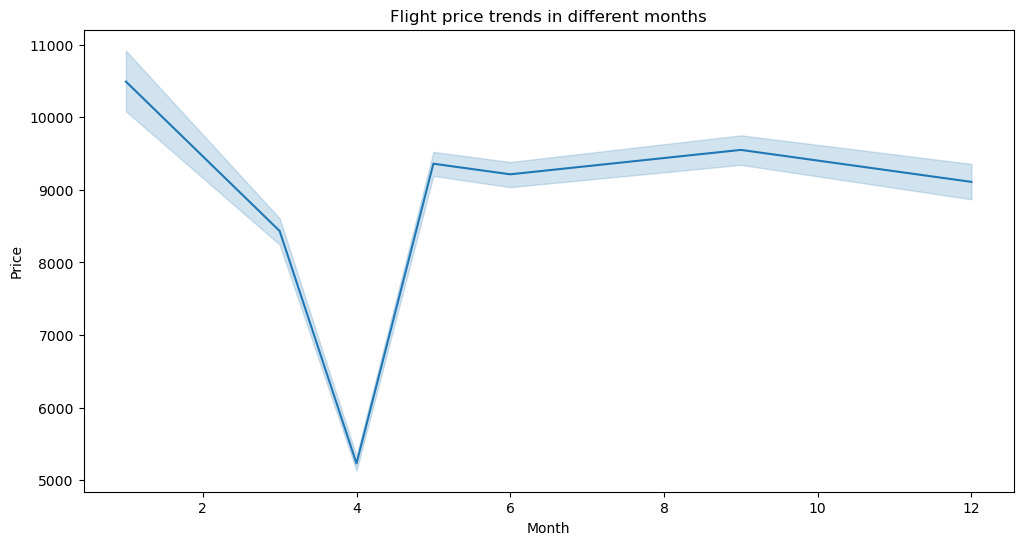

In [487]:
# 1. show trends in flight prices over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x="Month",y="Price")
plt.title("Flight price trends in different months")
plt.show()

## Observation: 
There is a steep fall in flight prices at the month of April

In [488]:
# 2.investigate the relationship between flight prices and other features such as duration, number of stops, and carrier.
#cleaning the duration
df["Duration_min"] = df.Duration.str.split("h").str[0].replace("5m","0").astype(int)*60 + df.Duration.str.split().str[1].str.split("m").str[0].fillna(0).astype(int)

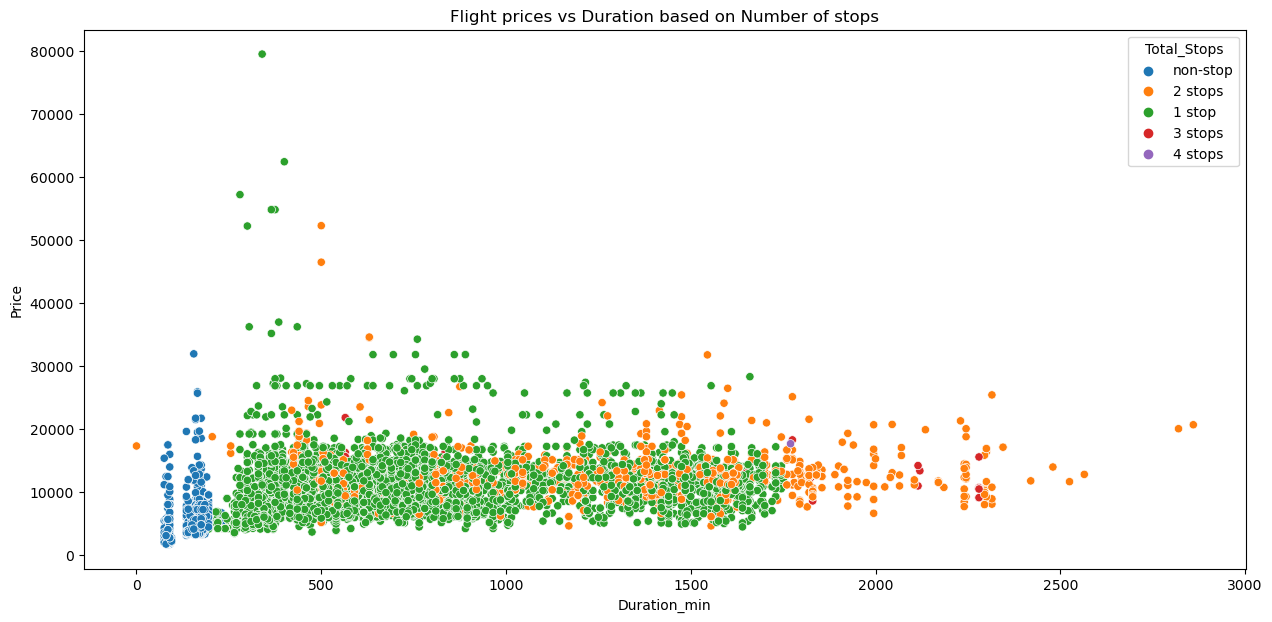

In [489]:
#Duration of flight, number of stops and flight price
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x="Duration_min",y="Price",hue="Total_Stops")
plt.title("Flight prices vs Duration based on Number of stops")
plt.show()

## Observation:
1. Non - stop flights are priced lower than others with lesser duration of travel
2. 1 stop flights are having the highest prices compared to others

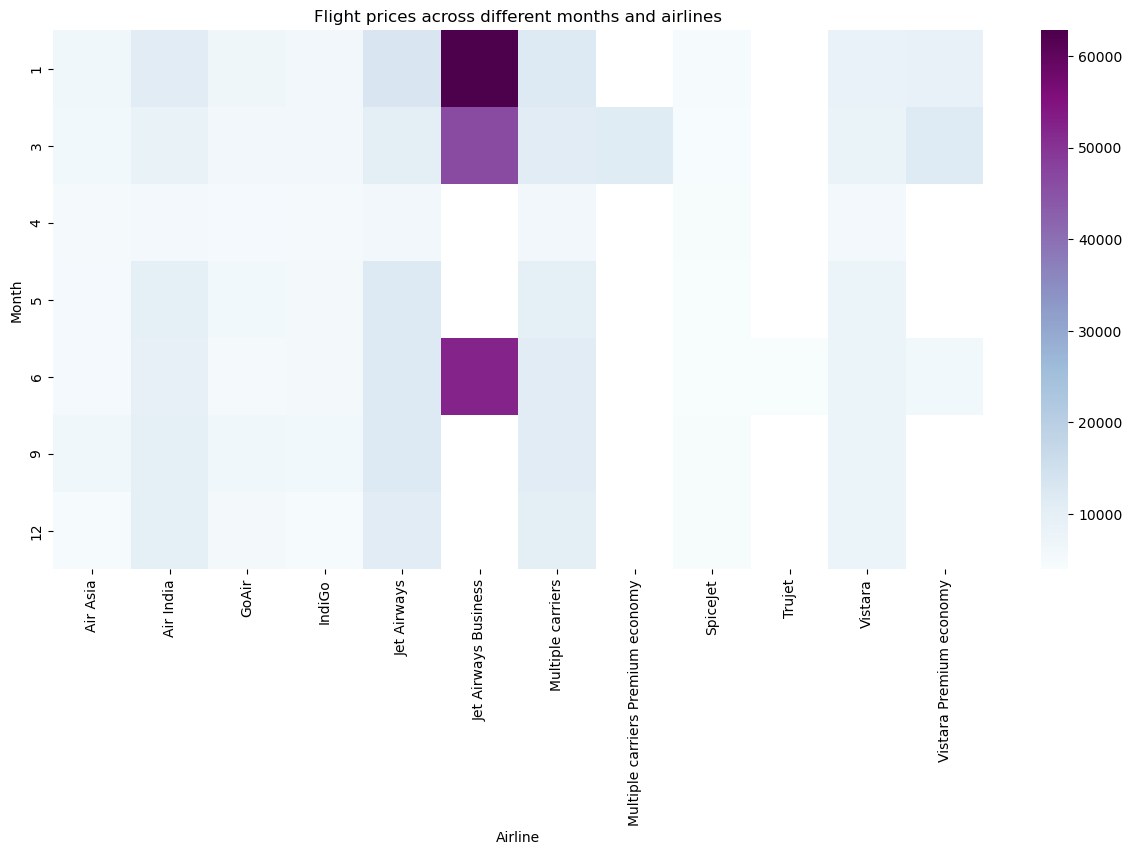

In [490]:
#3. relationship between prices and airline carriers across different seasons
plt.figure(figsize=(15,7))
sns.heatmap(df.pivot_table(index="Month",columns="Airline",values="Price"),cmap='BuPu')
plt.title("Flight prices across different months and airlines")
plt.show()

## Observations:
1. Jet Airways Bussiness class flying in Jan , March and June are heavily priced
2. Prices are comparable among all other airlines across months

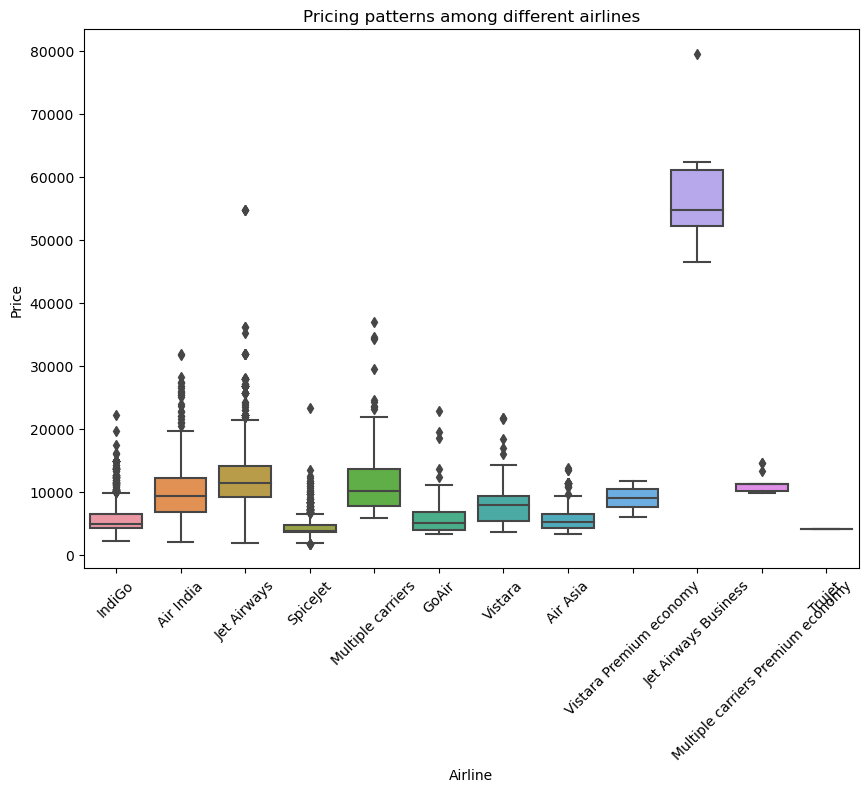

In [491]:
# 4. patterns in pricing between different carriers
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x="Airline",y="Price")
plt.xticks(rotation=45)
plt.title("Pricing patterns among different airlines")
plt.show()

## Observations:
1. vistara premium economy is the most expensive in terms of prices.
2. Prices are almost the same among all other airlines

## **GOOGLE PLAYSTORE DATASET**

In [492]:
df = pd.read_csv("https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


`Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?`

In [493]:
print("No. of rows is {} and the number of columns is {}".format(df.shape[0],df.shape[1]))

No. of rows is 10841 and the number of columns is 13


`Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.`

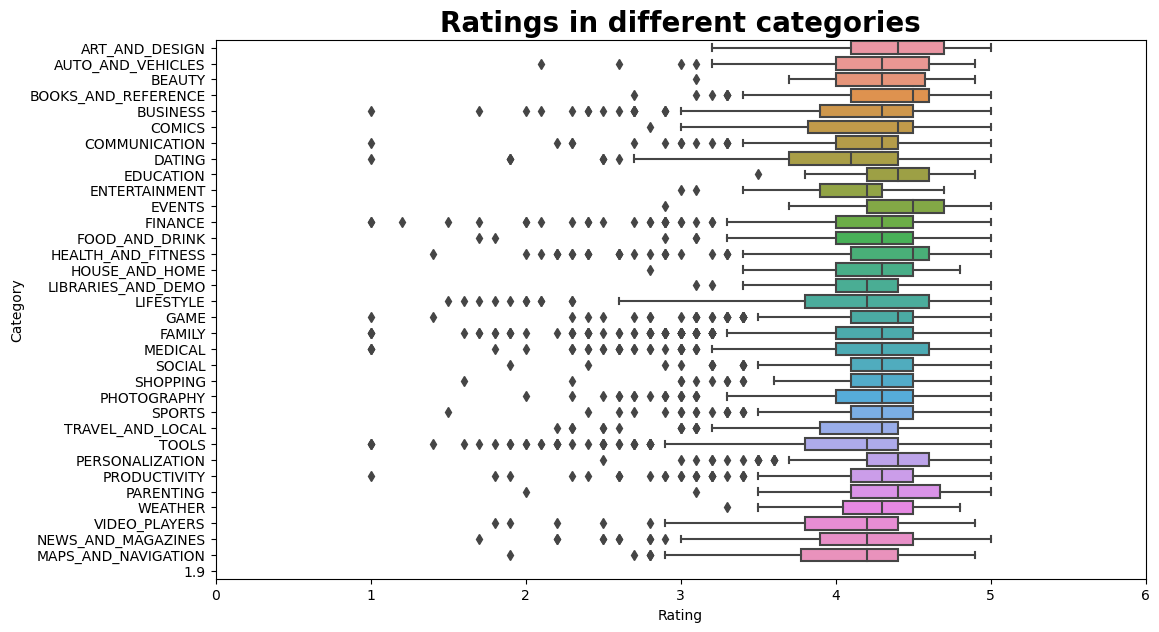

In [494]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df,y="Category",x="Rating")
plt.xlim(0,6)
plt.title("Ratings in different categories",fontweight="bold",fontsize=20)
plt.show()

`Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.`

<Axes: >

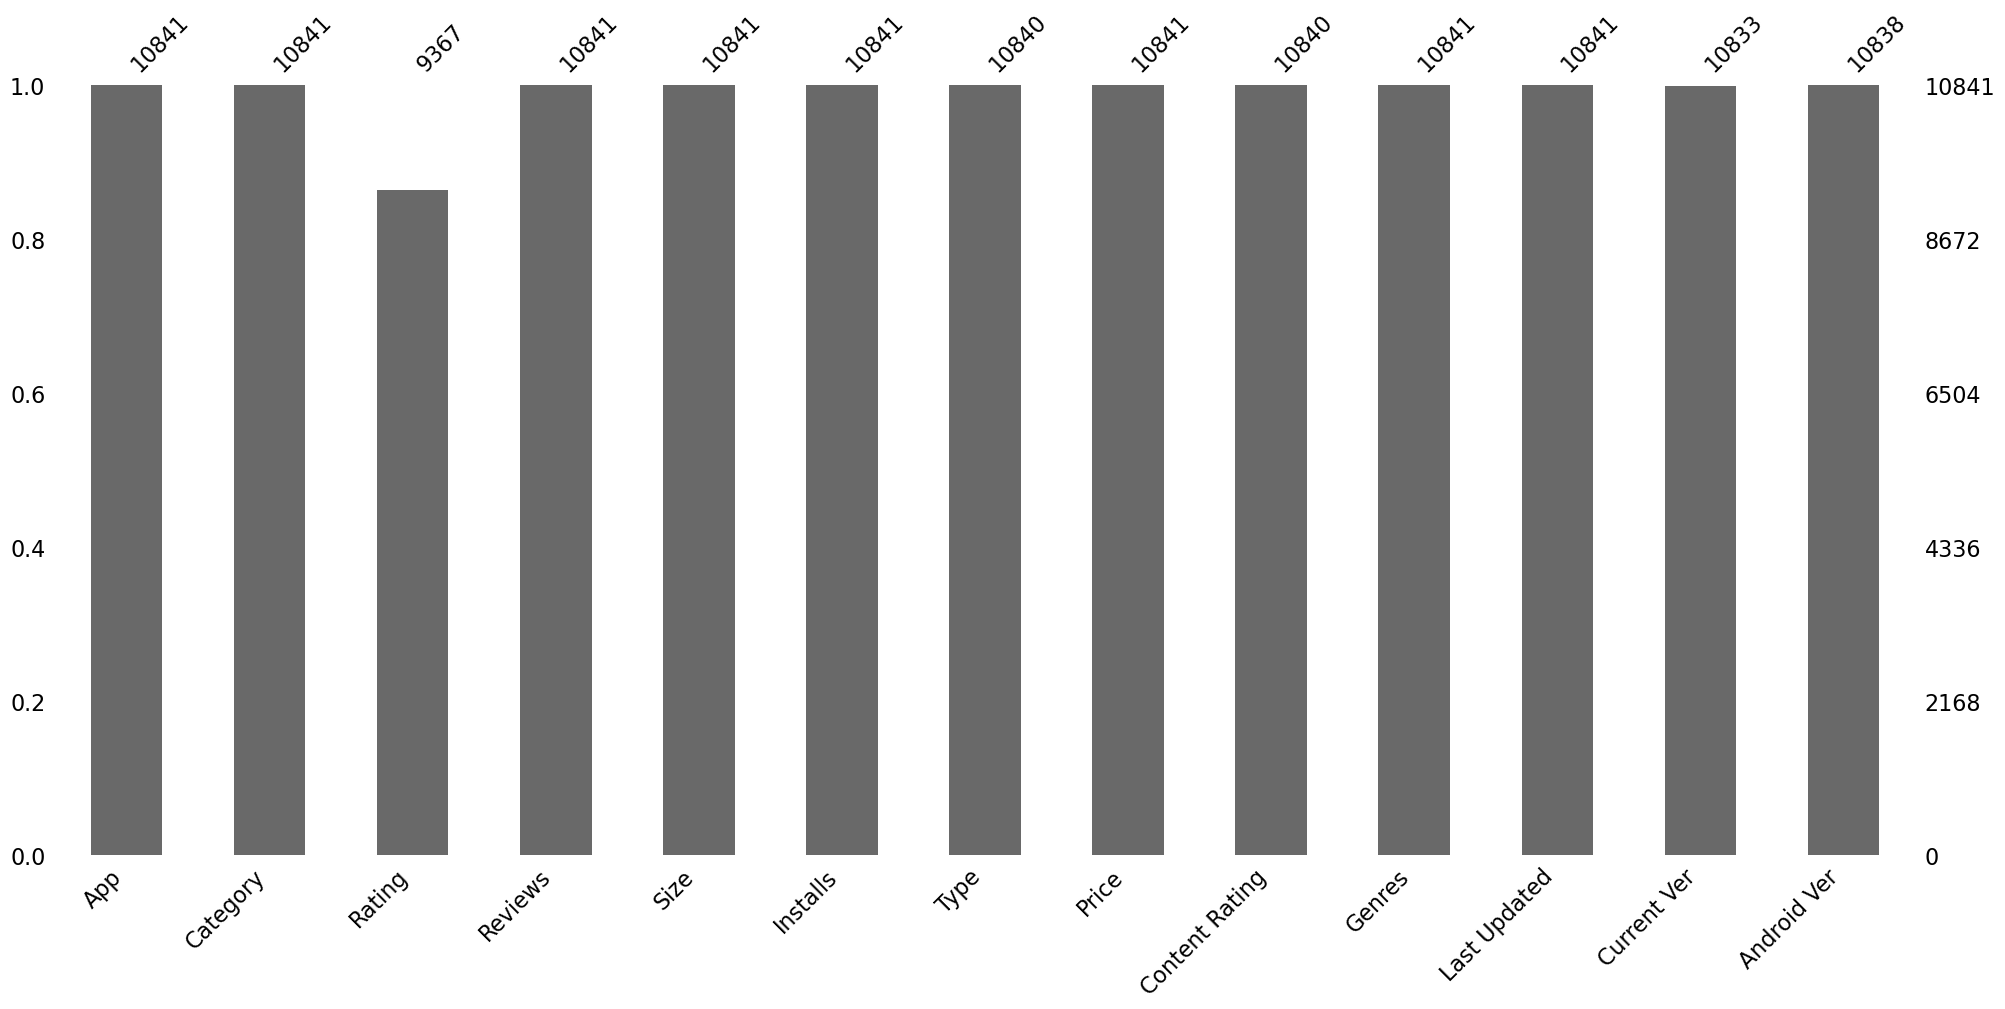

In [495]:
import missingno as msno
msno.bar(df)

In [496]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Observation:
There are 1474 missing values in ratings. If this is not handled before feeding this data into the model then it will lead to inaccurate estimates. Since Ratings is numerical data the missing values may result in dragging the mean to one side resulting in skeweness and also this may lead to false positive outliers

`Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.`

In [497]:
#cleaning the size column and converting it into uniform units
#defining a function to convert the Size column
def col_clean(i):
    if i.endswith("M"):
        return float(i.split("M")[0])
    elif i.endswith("k"):
        return float(i.split("k")[0])/1000
    else:
        if i == 'Varies with device':
            return (np.nan)

In [498]:
#converting the size column
df.Size = df.Size.apply(col_clean)

In [499]:
#filling missing values in Size column with mean
df.Size.fillna(df.Size.mean(),inplace=True)

In [500]:
df.Size.isnull().sum()

0

In [501]:
#cleaning the rating column
df.Rating = df.Rating.replace(19,1.9)

In [502]:
#filling the missing values of Ratings
df.Rating.fillna(df.Rating.mean(),inplace=True)

Text(0.5, 1.0, 'SIZE OF THE APP VS ITS RATING')

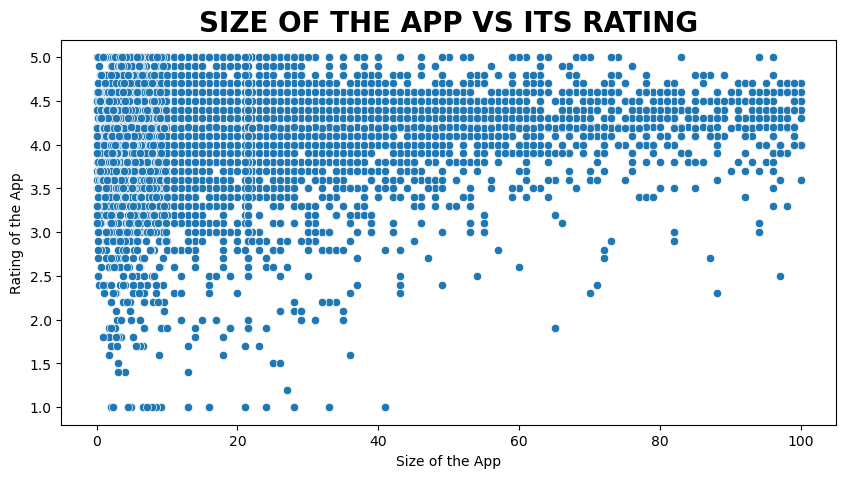

In [503]:
#plotting
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="Size",y="Rating")
plt.xlabel("Size of the App")
plt.ylabel("Rating of the App")
plt.title("SIZE OF THE APP VS ITS RATING",fontweight="bold",fontsize=20)

## Observation:
The greater the size of the app the higher is its rating

`Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.`

In [504]:
#cleaning the price column
df.Price = df.Price.str.strip("$").str.replace('Everyone',"0").astype(float)

In [505]:
#cleaning the type column
df.Type = df.Type.replace("0","Free")
df.Type.fillna(df.Type.mode(),inplace=True)

In [506]:
#calculating the average prices
data = df.groupby("Type")["Price"].mean()

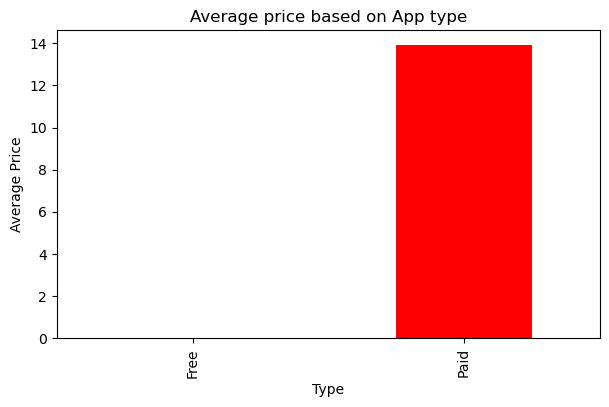

In [507]:
#plotting the bar chart
plt.figure(figsize=(7,4))
data.plot.bar(color="r")
plt.ylabel("Average Price")
plt.title("Average price based on App type")
plt.show()

`Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.`

In [508]:
#cleaning the installs column
df.Installs = df.Installs.str.strip("+").str.replace(",","").str.replace("Free","0").astype(int)

In [509]:
#Top 10 most popular Apps with frequency of installs
df[["App","Installs"]].sort_values("Installs",ascending=False)[:10]

,App,Installs
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000
2884,Google Photos,1000000000
3665,YouTube,1000000000
2853,Google Photos,1000000000
4234,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000


`Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?`

Text(0.5, 1.0, 'Top 10 Most popular App Categories')

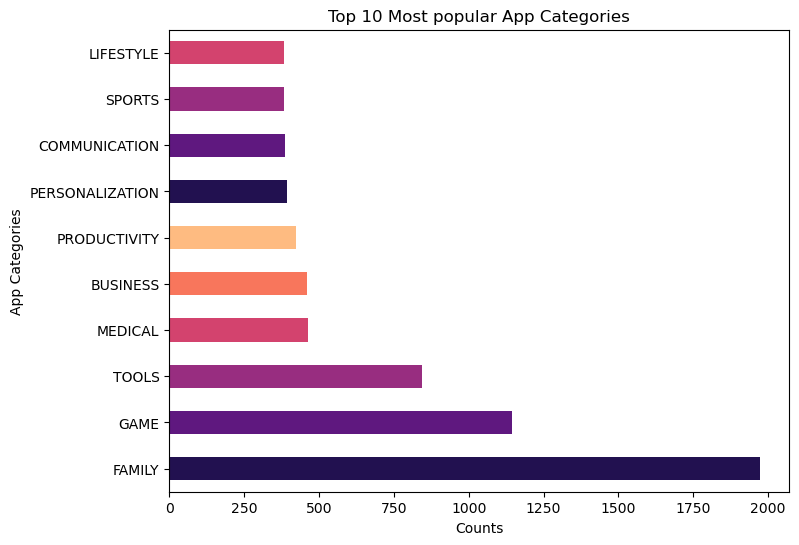

In [510]:
# To identify the most popular App category we can perform value counts on the Category column
data = df.Category.value_counts()[:10]
plt.figure(figsize=(8,6))
data.plot.barh(color=sns.color_palette("magma"))
plt.xlabel("Counts")
plt.ylabel("App Categories")
plt.title("Top 10 Most popular App Categories")

## Observation:
The top 3 most popular App Categories are Family , Games and Tools

`Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?`

To identify the most successful App developers we need to find the most popular apps. This can be answered by analysing the apps with most number of Installs

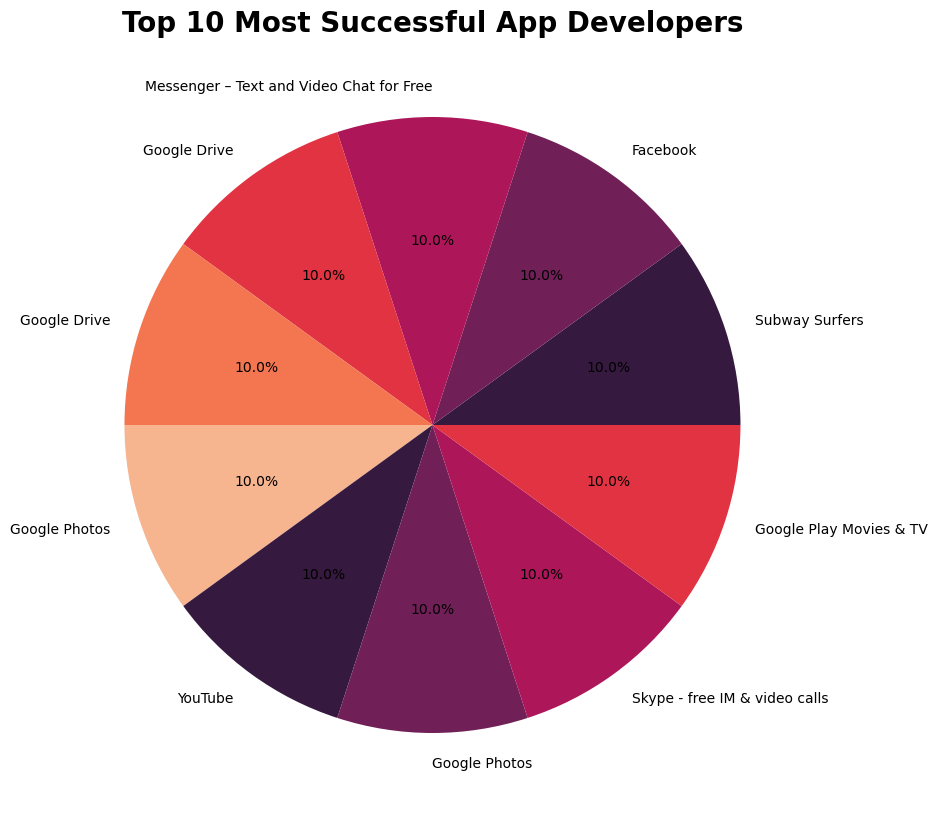

In [511]:
data = df[["App","Installs"]].sort_values("Installs",ascending=False)[:10] # data of top 10 apps downloaded

#plotting a pie chart
plt.figure(figsize=(10,10))
colors = sns.color_palette("rocket")[:10]
plt.pie(x = data.Installs, labels=data.App,autopct="%1.1f%%",colors=colors)
plt.title("Top 10 Most Successful App Developers", fontweight="bold" , fontsize =20)
plt.show()

`Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?`

To identify the best time to launch a new app on the Google Playstore, some of the features that can be analyzed are:

1. Monthly trends of app downloads and user ratings to identify the most popular categories and the apps that are performing well.

2. Analysis of user demographics and user behavior to identify the target audience for the new app.

3. Analysis of app ratings and reviews to understand user preferences and complaints, and identify the gaps in the current app offerings.

4. Analysis of pricing strategies and in-app purchases to identify the optimal pricing for the new app.

5. Analysis of the competition in the app store, including the number of apps in the same category, the rating of the top apps, and the user engagement.

Data visualizations that can be used to present these findings include:

1. Line charts or bar graphs to visualize the trends in app downloads, ratings, and reviews over time.

2. Pie charts or bar graphs to visualize user demographics and behavior, such as age, gender, and app usage patterns.

3. Scatter plots or heat maps to visualize user ratings and reviews, showing which features users liked or disliked the most.

4. Box plots or histograms to visualize pricing strategies and in-app purchases, showing the distribution of prices across different categories.

5. Heatmap to visualize the competition in the app store, showing the number of apps in each category and their reviews and user engagement in the form of number of installs.

In [512]:
# Cleaning Reviews
df.Reviews = df.Reviews.replace("3.0M","3000000")
df.Reviews = df.Reviews.astype(int)

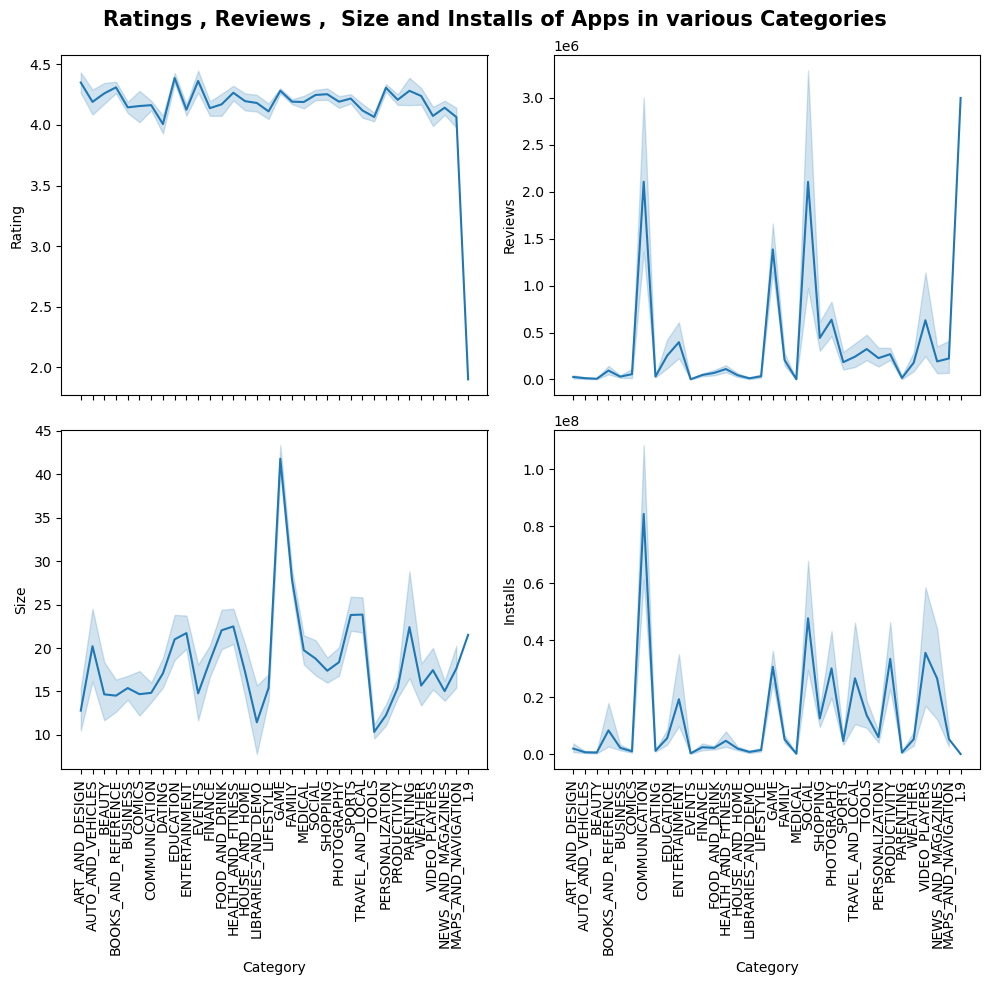

In [513]:
# Line chart for ratings ,Size and installs
plt.subplots(nrows=2 , ncols=2 , sharex=True , figsize = (10,10))
plt.suptitle("Ratings , Reviews ,  Size and Installs of Apps in various Categories", fontsize = 15 , fontweight = "bold" , )
cat = ['Rating',"Reviews", 'Size', 'Installs']
for i in range(0,len(cat)):
    plt.subplot(2 , 2 , i+1 )
    sns.lineplot(data=df, x = "Category" , y = cat[i] , orient = "x")
    plt.xticks(rotation= 90)
    plt.tight_layout()

## Observations: 
Communications , Games and Social Apps have higher ratings, reviews and installs with Game and family oriented Apps having larger install size 

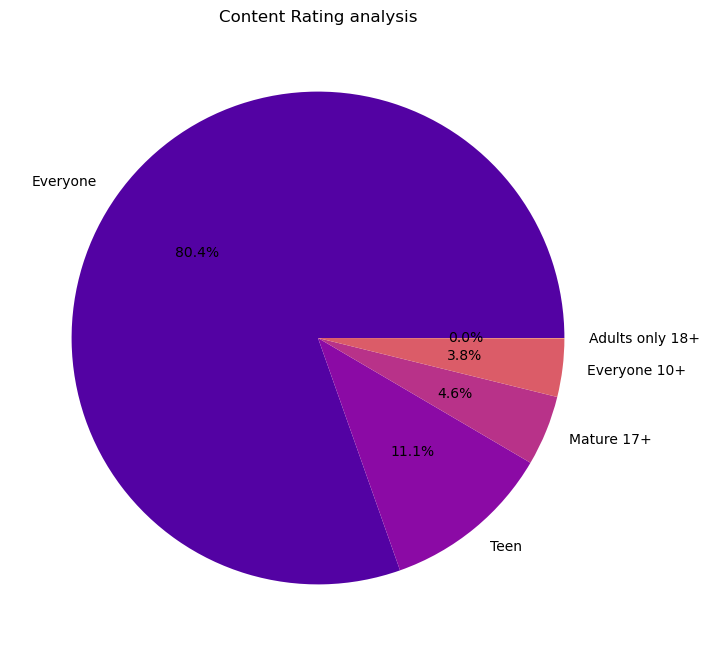

In [514]:
#Pie chart for content Rating
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma")[:len(df["Content Rating"].value_counts())-1]
plt.pie(x = df["Content Rating"].value_counts()[:-1] , labels= df["Content Rating"].value_counts().index[:-1] , autopct= "%1.1f%%" , colors=colors )
plt.title("Content Rating analysis")
plt.show()

## Observation:
Majority of Content ratings is by Everyone followed by Teens and Mature 17+ audiences

<Axes: xlabel='Rating', ylabel='Reviews'>

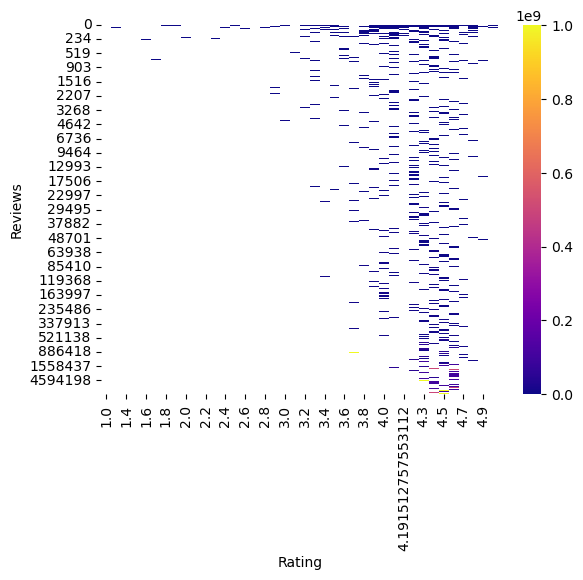

In [515]:
# Ratings , Reviews and Installs Heatmap analysis
data = df.pivot_table(index="Reviews", columns="Rating" , values = "Installs")
sns.heatmap(data, cmap="plasma")

## Observations:
Majority of installs  are seen between 2.8 and 4.7 rating and spread out across reviews

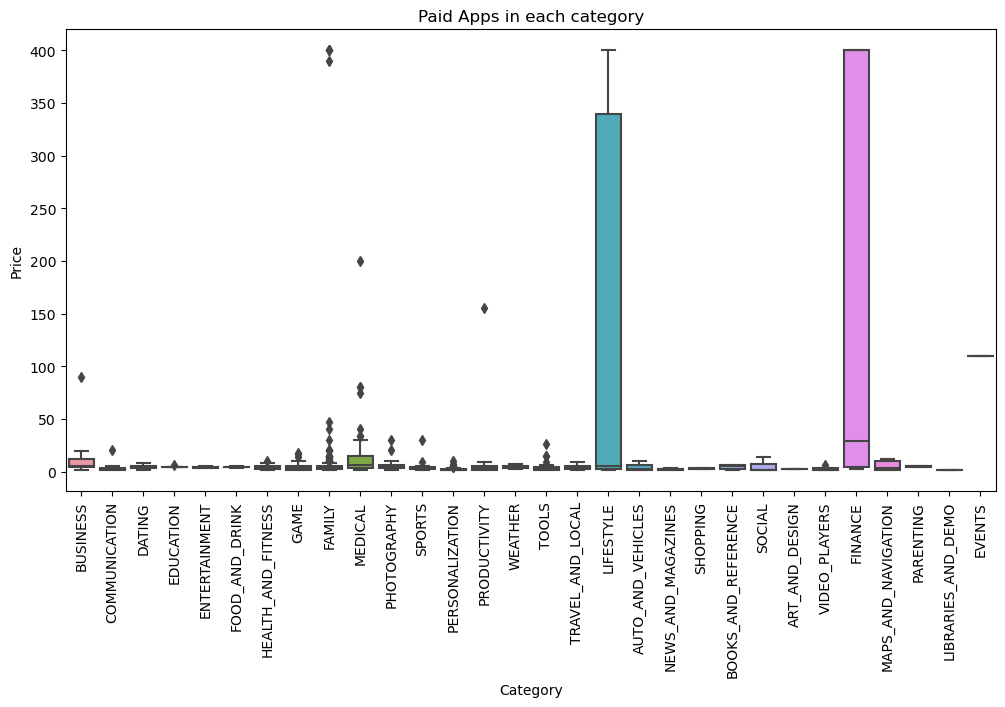

In [516]:
#Box plot of App Categories based on pricing
data = df[df.Type == "Paid"]
plt.figure(figsize=(12,6))
sns.boxplot(data, x = "Category" , y = "Price")
plt.xticks(rotation=90)
plt.title("Paid Apps in each category")
plt.show()

## Observation:
Finance , Lifestyle and Medical are the top 3 Categories with Paid Apps

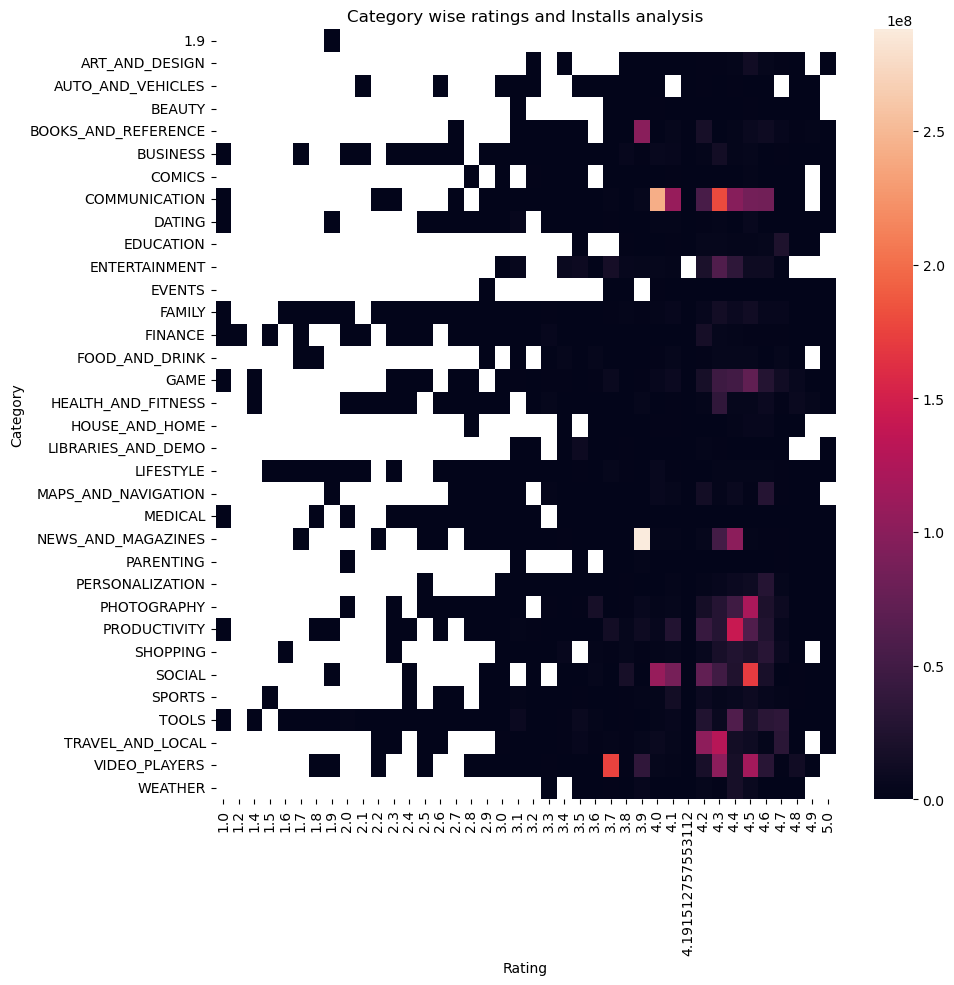

In [517]:
#Heatmap showing the number of apps in each category and their Reviews and user engagement in the form of number of installs.
data = df.pivot_table(index="Category",columns="Rating",values="Installs")
plt.figure(figsize=(10,10))
sns.heatmap(data)
plt.title("Category wise ratings and Installs analysis")
plt.show()

## Observations
Communcations  , Social and Video player apps seem to be the most popular categories fetching higher installs and ratings

## Final Inference:
1. Communications , Games and Social Apps have higher ratings, reviews and installs with Game and family oriented Apps having larger install size
2. Majority of Content ratings is by Everyone followed by Teens and Mature 17+ audiences
3. Majority of installs are seen between 2.8 and 4.7 rating and spread out across reviews
4. Communcations , Social and Video player apps seem to be the most popular categories fetching higher installs and ratings
5. Since app install dates are not a part of the dataset it is not possible to study the download trends of different apps but the most successful apps obtained from the previous answer is ['Subway Surfers',  'Facebook',  'Messenger – Text and Video Chat for Free',  'Google Drive',  'Google Drive',  'Google Photos',  'YouTube',  'Google Photos',  'Skype - free IM & video calls',  'Google Play Movies & TV']
​

The best bet for the new company will be to launch an App in the Communication , Games , Social or Video Player Category which is targeted for everyone.